In [1]:
import altair as alt
import geopandas as gpd
import pandas as pd
import json
import gpdvega
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import numpy as np
from vega_datasets import data
#%matplotlib inline

In [2]:
data_df = pd.read_csv("shapefile&2019_election.csv")

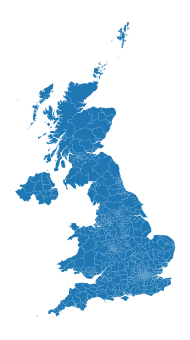

In [3]:
#loading in shapefile
map_df = gpd.read_file("Westminster_Parliamentary_Constituencies__December_2017__UK_BSC_V2.shp")
f, ax = plt.subplots(1, figsize=(6, 6))
ax = map_df.plot(ax=ax)
ax.set_axis_off()

In [4]:
data_df = pd.read_csv("2019_Election.csv")
combined = map_df.set_index("PCON17NM").join(data_df.set_index("constituency > label")).reset_index()

In [5]:
combined.at[610, "uri"] = "http://data.parliament.uk/resources/1223651"
combined.at[610, "election > label"] = "2019 General Election"
combined.at[610, "electorate"] = 51925
combined.at[610, "majority"] = 1968
combined.at[610, "result of election"] = "Con Gain"
combined.at[610, "turnout"] = 36552
combined.at[508, "uri"] = "http://data.parliament.uk/resources/1223627"
combined.at[508, "election > label"] = "2019 General Election"
combined.at[508, "electorate"] = 82526
combined.at[508, "majority"] = 17121
combined.at[508, "result of election"] = "Con Hold"
combined.at[508, "turnout"] = 55614

In [35]:
party_colour_dict = {"Alliance":"#F6CB2F",
"Con":"#0087DC",
"SNP":"#FDF38E",
"Lab":"#E4003B",
"DUP":"#D46A4C",
"Green":"#528D6B",
"LD":"#FAA61A",
"SDLP":"#2AA82C",
"PC":"#008142",
"SF":"#326760",
"Spk":"#000000"}

In [7]:
colours=[]
parties_pol=[]
election_list = list(combined['result of election'])
for seat in election_list:
    for parties in party_colour.keys():
        #print(party_colour[parties])
        if parties in seat:
            parties_pol.append(parties)
            colours.append(party_colour[parties])

In [8]:
combined["party"]= parties_pol

In [9]:
combined["party_colour"] = colours

In [10]:
def hex_to_rgb(value):
    """Return (red, green, blue) for the color given as #rrggbb."""
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

In [11]:
combined["party_colour_rgb"] = combined["party_colour"].apply(matplotlib.colors.to_rgba)

In [41]:
combined["turnout percentage"] = 100*combined["turnout"]/combined["electorate"]

TypeError: unsupported format string passed to Series.__format__

In [39]:
colours_obj = alt.Color(
    "party:N", #scale=None
    scale=alt.Scale(domain=list(party_colour_dict.keys()),range=list(party_colour_dict.values()))
)
selector = alt.selection_single(empty='all', fields=['party'])
colours_condition = alt.condition(selector, 
                                  colours_obj,       
                                  alt.value("lightgray"))


In [105]:

# GeoDataFrame could be passed as usual pd.DataFrame
bg = alt.Chart(combined).mark_geoshape(stroke='black'
).project(
).encode(
    #color=alt.Color('party_colour', scale=None),
    color=colours_condition,
    tooltip=['PCON17NM:N','result of election:N','turnout percentage:Q','majority:Q'],
).properties(width=1000,
    height=1000,).add_selection(selector)
bg

alt.Chart(...)

In [ ]:
#TODO
#on selection show number of constituencies
#turnout count slider

In [86]:
#slider = alt.binding_range(min=45, max=85, step=5)
#select_year = alt.selection_single(name="turnout percentage", fields=['turnout percentage'],
                                   bind=slider, init={'turnout percentage': 45})

In [112]:
#bg_2 = alt.Chart(combined).mark_geoshape(stroke='black'
#).project(
#).encode(
    #color=alt.Color('party_colour', scale=None),
 #   color=colours_obj,
  #  tooltip=['PCON17NM:N','result of election:N','turnout percentage:Q','majority:Q'],
#).properties(width=1000,
#    height=1000,).add_selection(
#    select_year
#).transform_filter(
#   "turnout_percentage" > select_year.turnout_percentage
#)
#bg_2

alt.Chart(...)